# Telecom Churn Group Case Study

## By E.S.V.Sriram & Ch. Sai Kiran 

`Problem Statement:`

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

`Solution Steps:`
1. Data Cleaning & Exploratory Data Analysis (EDA)
2. Data preparation for modelling
3. Model Building and Evaluation
4. Conclusion
    

## 1. Data Cleaning & Exploratory Data Analysis (EDA)

In [1]:
#Importing the necessary libraries for Data Preparation and EDA
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
#Importing warnings
import warnings
warnings.filterwarnings('ignore')
#Setting the number format upto 2 decimals
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [2]:
#Reading the data set
df1 = pd.read_csv('telecom_churn_data.csv')
pd.set_option('display.max_columns', None)
df1

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0000,0.0000,0.0000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.3850,214.8160,213.8030,21.1000,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,0.0000,0.0000,0.0000,0.0000,nan,nan,0.1600,nan,nan,nan,4.1300,nan,nan,nan,1.1500,nan,nan,nan,5.4400,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000,nan,nan,nan,0.0000

In [3]:
#Describing the dataset
df1.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0000,99999.0000,98981.0000,98981.0000,98981.0000,99999,99398,98899,98340,99999.0000,99999.0000,99999.0000,99999.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.0000,94621.0000,92254.0000,96062.0000,96140.

In [4]:
#Checking Circle_id values
df1['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

In [5]:
#Checking the mobile_number column whether it is unique or not
df1['mobile_number'].duplicated().sum()

0

This dataset is related to Circle_id 109 and all the mobile numbers are unique. So, we can drop these two columns `circle_id` and `mobile_number` which are not suitable for our analysis. 

In [6]:
#Dropping
df1.drop(['circle_id','mobile_number'],axis=1,inplace=True)

In [7]:
#Let's check the data types for each feature
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 224 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   loc_og_t2o_mou            float64
 1   std_og_t2o_mou            float64
 2   loc_ic_t2o_mou            float64
 3   last_date_of_month_6      object 
 4   last_date_of_month_7      object 
 5   last_date_of_month_8      object 
 6   last_date_of_month_9      object 
 7   arpu_6                    float64
 8   arpu_7                    float64
 9   arpu_8                    float64
 10  arpu_9                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  onnet_mou_9               float64
 15  offnet_mou_6              float64
 16  offnet_mou_7              float64
 17  offnet_mou_8              float64
 18  offnet_mou_9              float64
 19  roam_ic_mou_6             float64
 20  roam_ic_mou_7             f

In [8]:
#Dividing columns into numerical, categorical and date

date_features = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
             'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_features =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

non_num_features = date_features + cat_features

num_features = [i for i in df1.columns if i not in non_num_features]

print("There are {0} categorical features, {1} numerical features and {2} date features".format(len(cat_features),len(num_features),len(date_features)))


There are 8 categorical features, 204 numerical features and 12 date features


In [9]:
#Let's convert these date columns into date_time format
df1[date_features] = df1[date_features].apply(pd.to_datetime)
#Cross-Check_1
df1[date_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [10]:
#Cross-Check_2
df1[date_features].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


In [11]:
#Checking Shape
df1.shape

(99999, 224)

### Missing Value Treatment

In [12]:
#Missing value check
Miss = pd.DataFrame({'Columns':df1.columns,'Missing Value %':(df1.isna().sum()*100)/(len(df1))})
Miss = Miss.sort_values(by= 'Missing Value %',ascending = False)
Miss.set_index('Columns', inplace=True)
Miss

,Missing Value %
Columns,
date_of_last_rech_data_6,74.8467
arpu_2g_6,74.8467
count_rech_3g_6,74.8467
night_pck_user_6,74.8467
count_rech_2g_6,74.8467
...,...
total_ic_mou_9,0.0000
total_ic_mou_8,0.0000
total_ic_mou_7,0.0000


In [13]:
#Only those columns having missing values
Miss[Miss['Missing Value %'] > 0]

,Missing Value %
Columns,
date_of_last_rech_data_6,74.8467
arpu_2g_6,74.8467
count_rech_3g_6,74.8467
night_pck_user_6,74.8467
count_rech_2g_6,74.8467
...,...
last_date_of_month_8,1.1000
loc_og_t2o_mou,1.0180
std_og_t2o_mou,1.0180


There are about 166 columns having missing values. Let's check them.

In [14]:
#Let's fetch the above columns into a list
Miss_cols = Miss[Miss['Missing Value %']>0].index.tolist()
Miss_cols

['date_of_last_rech_data_6',
 'arpu_2g_6',
 'count_rech_3g_6',
 'night_pck_user_6',
 'count_rech_2g_6',
 'arpu_3g_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'fb_user_6',
 'total_rech_data_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'arpu_2g_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'fb_user_7',
 'total_rech_data_7',
 'av_rech_amt_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'arpu_3g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'max_rech_data_9',
 'night_pck_user_9',
 'date_of_last_rech_data_9',
 'fb_user_9',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8',
 'max_rech_data_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'arpu_2g_8',
 'total_rech_data_8',
 'fb_user_8',
 'night_pck_user_8',
 'loc_og_t2f_mou_9',
 'loc_ic_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'offnet_mou_9',
 'loc_og_t2m_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'roam_ic_mou_9',
 'std

In [15]:
#Let's describe
df1[Miss_cols].describe()

,arpu_2g_6,count_rech_3g_6,night_pck_user_6,count_rech_2g_6,arpu_3g_6,max_rech_data_6,av_rech_amt_data_6,fb_user_6,total_rech_data_6,night_pck_user_7,arpu_2g_7,max_rech_data_7,arpu_3g_7,fb_user_7,total_rech_data_7,av_rech_amt_data_7,count_rech_3g_7,count_rech_2g_7,arpu_3g_9,count_rech_3g_9,av_rech_amt_data_9,total_rech_data_9,arpu_2g_9,count_rech_2g_9,max_rech_data_9,night_pck_user_9,fb_user_9,count_rech_3g_8,av_rech_amt_data_8,count_rech_2g_8,max_rech_data_8,arpu_3g_8,arpu_2g_8,total_rech_data_8,fb_user_8,night_pck_user_8,loc_og_t2f_mou_9,loc_ic_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,offnet_mou_9,loc_og_t2m_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,roam_ic_mou_9,std_ic_t2t_mou_9,std_og_t2c_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,spl_ic_mou_9,isd_ic_mou_9,std_og_mou_9,ic_others_9,loc_og_t2c_mou_9,std_og_t2m_mou_9,std_og_t2t_mou_9,onnet_mou_9,std_og_t2f_mou_9,loc_og_mou_9,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_og_mou_8,roam_ic_mou_8,loc_ic_t2f_mou_8,std_og_t2m_mou_8,std_ic_mou_8,ic_others_8,loc_ic_mou_8,roam_og_mou_8,std_ic_t2t_mou_8,std_ic_t2o_mou_8,loc_og_t2m_mou_8,std_ic_t2m_mou_8,std_og_t2t_mou_8,std_ic_t2f_mou_8,loc_og_t2t_mou_8,spl_og_mou_8,isd_ic_mou_8,std_og_mou_8,onnet_mou_8,spl_ic_mou_8,std_og_t2f_mou_8,loc_og_t2f_mou_8,og_others_8,offnet_mou_8,std_og_t2c_mou_8,loc_og_t2c_mou_8,isd_og_mou_8,std_ic_t2o_mou_6,ic_others_6,spl_ic_mou_6,std_og_t2t_mou_6,std_ic_mou_6,loc_og_mou_6,isd_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,onnet_mou_6,std_og_mou_6,loc_ic_t2m_mou_6,std_ic_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,std_og_t2c_mou_6,og_others_6,loc_og_t2f_mou_6,loc_ic_t2t_mou_6,roam_ic_mou_6,std_og_t2f_mou_6,std_og_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,offnet_mou_6,std_ic_t2t_mou_6,loc_og_t2c_mou_6,std_ic_t2m_mou_6,roam_og_mou_6,roam_ic_mou_7,onnet_mou_7,loc_og_t2t_mou_7,offnet_mou_7,roam_og_mou_7,std_ic_t2t_mou_7,ic_others_7,og_others_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_t2c_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,isd_ic_mou_7,std_ic_t2o_mou_7,loc_og_t2f_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,loc_og_t2m_mou_7,spl_ic_mou_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou
count,25153.0000,25153.0000,25153.0000,25153.0000,25153.0000,25153.0000,25153.0000,25153.0000,25153.0000,25571.0000,25571.0000,25571.0000,25571.0000,25571.0000,25571.0000,25571.0000,25571.0000,25571.0000,25922.0000,25922.0000,25922.0000,25922.0000,25922.0000,25922.0000,25922.0000,25922.0000,25922.0000,26339.0000,26339.0000,26339.0000,26339.0000,26339.0000,26339.0000,26339.0000,26339.0000,26339.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,9898

 From the above description, we found that:
 -  `fb_user` and `night_pck_user` columns are categorical, i.e., having only two values either 1 or 0. For these columns we can impute missing values with a new label '-1' meaning 'No Info'.
 - While for the remaining columns, we need to check in depth.

In [16]:
#Imputing missing values in the categorical columns with '-1' means 'No Info' 
df1[cat_features] = df1[cat_features].fillna(-1)
#Cross-Check
df1[cat_features].isna().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [17]:
#Importing regex
import re
#Let's check the recharge columns
rech = [col for col in Miss_cols if re.search('rech',col)]
rech

['date_of_last_rech_data_6',
 'count_rech_3g_6',
 'count_rech_2g_6',
 'max_rech_data_6',
 'av_rech_amt_data_6',
 'total_rech_data_6',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'total_rech_data_7',
 'av_rech_amt_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'count_rech_2g_9',
 'max_rech_data_9',
 'date_of_last_rech_data_9',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'count_rech_2g_8',
 'max_rech_data_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'date_of_last_rech_9',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [18]:
#Inspecting all the recharge columns
df1[rech]

,date_of_last_rech_data_6,count_rech_3g_6,count_rech_2g_6,max_rech_data_6,av_rech_amt_data_6,total_rech_data_6,date_of_last_rech_data_7,max_rech_data_7,total_rech_data_7,av_rech_amt_data_7,count_rech_3g_7,count_rech_2g_7,count_rech_3g_9,av_rech_amt_data_9,total_rech_data_9,count_rech_2g_9,max_rech_data_9,date_of_last_rech_data_9,count_rech_3g_8,av_rech_amt_data_8,count_rech_2g_8,max_rech_data_8,date_of_last_rech_data_8,total_rech_data_8,date_of_last_rech_9,date_of_last_rech_8,date_of_last_rech_7,date_of_last_rech_6
0,2014-06-21,1.0000,0.0000,252.0000,252.0000,1.0000,2014-07-16,252.0000,1.0000,252.0000,1.0000,0.0000,nan,nan,nan,nan,nan,NaT,1.0000,252.0000,0.0000,252.0000,2014-08-08,1.0000,2014-09-28,2014-08-08,2014-07-16,2014-06-21
1,NaT,nan,nan,nan,nan,nan,2014-07-25,154.0000,1.0000,154.0000,0.0000,1.0000,nan,nan,nan,nan,nan,NaT,0.0000,50.0000,2.0000,25.0000,2014-08-10,2.0000,2014-09-30,2014-08-28,2014-07-31,2014-06-29
2,NaT,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,0.0000,46.0000,1.0000,1.0000,46.0000,2014-09-17,nan,nan,nan,nan,NaT,nan,2014-09-29,2014-08-14,2014-07-24,2014-06-17
3,NaT,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,NaT,nan,2014-09-30,2014-08-31,2014-07-31,2014-06-28
4,2014-06-04,0.0000,1.0000,56.0000,56.0000,1.0000,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,NaT,nan,2014-09-28,2014-08-09,2014-07-28,2014-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,NaT,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,NaT,nan,2014-09-25,2014-08-26,2014-07-20,2014-06-03
99995,NaT,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,NaT,nan,2014-09-26,2014-08-24,2014-07-17,2014-06-17
99996,2014-06-13,0.0000,2.0000,25.0000,39.0000,2.0000,NaT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT,nan,nan,nan,nan,NaT,nan,2014-09-02,NaT,2014-07-26,2014-06-13
99997,2014-06-17,2.0000,1.0000,202.0000,583.0000,3.0000,2014-07-19,179.0000,2.0000,358.0000,2.0000,0.0000,4.0000,862.0000,4.0000,0.0000,252.0000,2014-09-17,4.0000,716.0000,0.0000,179.0000,2014-08-20,4.0000,2014-09-17,2014-08-20,2014-07-19,2014-06-17


`Inference:`
For a  month if `date_of_last_rech_data` is having missing value,remaining columns related to data(Internet 2G or 3G) are also having missing values. Meaning, data recharge is not done by the customer in that month. So, we can impute those data columns with 0.0. 

In [19]:
# removing date columns from rech
date_rech = df1[rech].select_dtypes(include = 'datetime').columns.tolist()
for i in date_rech:
    if i in rech:
        rech.remove(i)
print(rech)        

['count_rech_3g_6', 'count_rech_2g_6', 'max_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_6', 'max_rech_data_7', 'total_rech_data_7', 'av_rech_amt_data_7', 'count_rech_3g_7', 'count_rech_2g_7', 'count_rech_3g_9', 'av_rech_amt_data_9', 'total_rech_data_9', 'count_rech_2g_9', 'max_rech_data_9', 'count_rech_3g_8', 'av_rech_amt_data_8', 'count_rech_2g_8', 'max_rech_data_8', 'total_rech_data_8']


In [20]:
#Imputing missing values with 0.0
df1[rech] = df1[rech].fillna(0.0)
#Cross-Check_1
df1[rech].isna().sum()

count_rech_3g_6       0
count_rech_2g_6       0
max_rech_data_6       0
av_rech_amt_data_6    0
total_rech_data_6     0
max_rech_data_7       0
total_rech_data_7     0
av_rech_amt_data_7    0
count_rech_3g_7       0
count_rech_2g_7       0
count_rech_3g_9       0
av_rech_amt_data_9    0
total_rech_data_9     0
count_rech_2g_9       0
max_rech_data_9       0
count_rech_3g_8       0
av_rech_amt_data_8    0
count_rech_2g_8       0
max_rech_data_8       0
total_rech_data_8     0
dtype: int64

In [21]:
#Missing values check
Miss = pd.DataFrame({'Columns':df1.columns,'Missing Value %':(df1.isna().sum()*100)/(len(df1))})
Miss = Miss.sort_values(by= 'Missing Value %',ascending = False)
Miss.set_index('Columns', inplace=True)
Miss

,Missing Value %
Columns,
date_of_last_rech_data_6,74.8467
arpu_3g_6,74.8467
arpu_2g_6,74.8467
date_of_last_rech_data_7,74.4287
arpu_3g_7,74.4287
...,...
max_rech_data_6,0.0000
total_rech_data_9,0.0000
total_rech_data_8,0.0000


In [22]:
#Missing values >= 70% check
Miss = pd.DataFrame({'Columns':df1.columns,'Missing Value %':(df1.isna().sum()*100)/(len(df1))})
Miss = Miss.sort_values(by= 'Missing Value %',ascending = False)
Miss.set_index('Columns', inplace=True)
Miss_70 = Miss[Miss['Missing Value %']>=70].index.tolist()
print("There are {0} features with missing values >=70%".format(len(Miss_70)))

There are 12 features with missing values >=70%


In [23]:
#dropping columns with missing values >=70%
df1.drop(Miss_70, axis = 1, inplace = True)

In [24]:
#Missing values check
Miss = pd.DataFrame({'Columns':df1.columns,'Missing Value %':(df1.isna().sum()*100)/(len(df1))})
Miss = Miss.sort_values(by= 'Missing Value %',ascending = False)
Miss.set_index('Columns', inplace=True)
Miss

,Missing Value %
Columns,
std_ic_t2m_mou_9,7.7451
offnet_mou_9,7.7451
roam_ic_mou_9,7.7451
roam_og_mou_9,7.7451
isd_ic_mou_9,7.7451
...,...
last_day_rch_amt_8,0.0000
last_day_rch_amt_7,0.0000
last_day_rch_amt_6,0.0000


In [25]:
#Let's fetch the columns having missing values into a list
Miss_cols = Miss[Miss['Missing Value %']>0].index.tolist()
Miss_cols

['std_ic_t2m_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'isd_ic_mou_9',
 'og_others_9',
 'loc_og_t2t_mou_9',
 'spl_og_mou_9',
 'isd_og_mou_9',
 'loc_og_t2m_mou_9',
 'std_og_mou_9',
 'loc_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_mou_9',
 'ic_others_9',
 'spl_ic_mou_9',
 'std_ic_mou_9',
 'loc_ic_mou_9',
 'onnet_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_t2t_mou_9',
 'loc_ic_t2f_mou_9',
 'std_ic_t2f_mou_9',
 'spl_ic_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_mou_8',
 'std_ic_t2o_mou_8',
 'std_og_mou_8',
 'loc_ic_t2f_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'std_ic_t2m_mou_8',
 'og_others_8',
 'std_ic_t2t_mou_8',
 'isd_ic_mou_8',
 'loc_ic_t2t_mou_8',
 'std_og_t2t_mou_8',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2c_mou_8',
 'ic_others_8',
 'loc_og_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2

In [26]:
#Describing recharge columns
df1[Miss_cols].describe()

,std_ic_t2m_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,isd_ic_mou_9,og_others_9,loc_og_t2t_mou_9,spl_og_mou_9,isd_og_mou_9,loc_og_t2m_mou_9,std_og_mou_9,loc_og_t2f_mou_9,std_og_t2c_mou_9,std_og_t2f_mou_9,loc_og_t2c_mou_9,std_og_t2m_mou_9,std_og_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2t_mou_9,loc_og_mou_9,ic_others_9,spl_ic_mou_9,std_ic_mou_9,loc_ic_mou_9,onnet_mou_9,std_ic_t2o_mou_9,std_ic_t2t_mou_9,loc_ic_t2f_mou_9,std_ic_t2f_mou_9,spl_ic_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_ic_mou_8,std_ic_t2o_mou_8,std_og_mou_8,loc_ic_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,std_ic_t2m_mou_8,og_others_8,std_ic_t2t_mou_8,isd_ic_mou_8,loc_ic_t2t_mou_8,std_og_t2t_mou_8,loc_ic_mou_8,loc_ic_t2m_mou_8,std_ic_t2f_mou_8,std_og_t2c_mou_8,ic_others_8,loc_og_mou_8,offnet_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2c_mou_8,roam_ic_mou_8,onnet_mou_8,roam_og_mou_8,loc_og_t2f_mou_8,std_ic_t2f_mou_6,onnet_mou_6,ic_others_6,loc_og_t2t_mou_6,std_ic_t2m_mou_6,roam_og_mou_6,loc_ic_t2t_mou_6,std_og_t2t_mou_6,loc_og_t2m_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,roam_ic_mou_6,loc_ic_mou_6,og_others_6,offnet_mou_6,isd_ic_mou_6,loc_og_t2c_mou_6,std_og_t2m_mou_6,loc_og_mou_6,std_og_t2f_mou_6,std_ic_mou_6,std_og_t2c_mou_6,std_ic_t2o_mou_6,spl_ic_mou_6,std_og_mou_6,isd_og_mou_6,loc_og_t2f_mou_6,spl_og_mou_6,onnet_mou_7,offnet_mou_7,ic_others_7,std_ic_t2o_mou_7,std_ic_t2t_mou_7,std_ic_t2f_mou_7,std_ic_t2m_mou_7,std_ic_mou_7,std_og_t2t_mou_7,roam_og_mou_7,loc_ic_mou_7,isd_og_mou_7,std_og_t2m_mou_7,loc_og_mou_7,std_og_t2f_mou_7,loc_og_t2c_mou_7,std_og_t2c_mou_7,loc_ic_t2f_mou_7,loc_og_t2f_mou_7,std_og_mou_7,spl_og_mou_7,loc_og_t2m_mou_7,og_others_7,loc_og_t2t_mou_7,isd_ic_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,roam_ic_mou_7,spl_ic_mou_7,loc_og_t2o_mou,loc_ic_t2o_mou,std_og_t2o_mou
count,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,92254.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,94621.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96062.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,96140.0000,98981.0000,98981.0000,98981.0000
mean,19.6209,190.3372,6.3438,8.5555,8.0630,0.0475,44.5844,4.4128,0.7239,90.4632,169.6645,3.6551,0.0000,1.0424,1.2327,86.2766,82.3429,106.1555,46.2818,138.7100,1.0172,0.1631,31.2293,164.6193,130.3023,0.0000,9.4325,12.1731,2.1734,0.0404,89.8384,1.0678,33.1547,0.0000,174.1915,11.7518,0.7912,5.0538,21.1832,0.0334,9.8839,8.4420,47.2114,83.2827,167.4326,108.4605,2.0850,0.0000,0.9708,141.3282,196.5748,45.8878,91.7551,1.4338,7.2930,133.0181,9.9719,3.6780,2.1564,132.3959,0.8547,47.1008,20.7222,13.9113,47.9224,79.8299,93.3421,107.4757,12.0843,9.5760,9.9500,167.4911,0.4542,197.9356,7.4606,1.1231,87.2996,144.2012,1.1290,32.4572,0.0000,0.0000,0.0616,168.2612,0.7983,3.7510,3.9168,133.6708,197.0451,1.0130,0.0000,10.0119,2.2169,21.6564,33.8878,83.2996,9.8187,167.7195,0.7766,90.8041,141.6705,1.1150,1.3685,0.0000,12.5997,3.7930,175.2214,4.9783,91.3971,0.0302,46.4730,8.3349,47.9905,107.1205,7.1499,0.0

In [27]:
# Identify columns that have no varience
df1_unique_count = df1.nunique().sort_values(ascending=False)
# Identify bad colums that has no infromation (all entries are NA or same)

# Find columns with all NULL entries and add to drop_columns list
df1_zero = df1_unique_count[df1_unique_count == 0]
drop_no_variance_columns = list(df1_zero.index)

# Find columns with all same entries and add to drop_columns list
df1_one = df1_unique_count[df1_unique_count == 1]
drop_no_variance_columns += list(df1_one.index)



In [28]:
# Dropping the columns that have no varience
df1.drop(drop_no_variance_columns, axis=1, inplace=True)

print('Dataframe Shape: ', df1.shape)
print('Number of columns dropped here  = ', len(drop_no_variance_columns))
print('Dataframe Shape: ', df1.shape)

Dataframe Shape:  (99999, 197)
Number of columns dropped here  =  15
Dataframe Shape:  (99999, 197)


In [29]:
#Missing values check
Miss = pd.DataFrame({'Columns':df1.columns,'Missing Value %':(df1.isna().sum()*100)/(len(df1))})
Miss = Miss.sort_values(by= 'Missing Value %',ascending = False)
Miss.set_index('Columns', inplace=True)
Miss

,Missing Value %
Columns,
loc_og_t2f_mou_9,7.7451
std_og_t2t_mou_9,7.7451
loc_og_t2t_mou_9,7.7451
loc_ic_t2m_mou_9,7.7451
loc_og_t2m_mou_9,7.7451
...,...
last_day_rch_amt_8,0.0000
last_day_rch_amt_7,0.0000
last_day_rch_amt_6,0.0000


In [30]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  df1.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = df1.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0         81
7         27
10        27
11         1
15        27
        ... 
99983     55
99985      1
99993    111
99996     82
99998     84
Length: 15814, dtype: int64

In [31]:
#checking the mode of missing values
rows_missing_data[rows_missing_data > 0].mode()

0    27
dtype: int64

In [32]:
# considering mode, most of the rows have more than or equal to 27 missing values
drop_record = df1.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_record.sum()))
print("  % of rows with >= 27 missing values = {} %".format(drop_record.sum()/df1.shape[0]*100))


Number of rows with >= 27 missing values = 11672
  % of rows with >= 27 missing values = 11.67211672116721 %


In [33]:
#drop rows with missing values >= 27
df1 = df1[df1.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', df1.shape)

Dataframe Shape after dropping rows:  (88327, 197)


In [34]:
#Missing values check

Miss = round(100*(df1.isnull().sum()/len(df1.index)), 2)
Miss[Miss > 0]

date_of_last_rech_6   0.8400
date_of_last_rech_7   0.6600
date_of_last_rech_8   1.6600
date_of_last_rech_9   2.0100
dtype: float64

In [35]:
# taking the date columns into date_dimensions
date_dimensions = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8","date_of_last_rech_9"]
df1[date_dimensions].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-26,2014-07-28,2014-08-09,2014-09-28
5,2014-06-19,2014-07-17,2014-08-24,2014-09-28


In [36]:
# Create new features based on the date columns columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

df1["rech_days_left_6"]      = (last_date_of_month_6 - df1.date_of_last_rech_6).astype('timedelta64[D]')
df1["rech_days_left_7"]      = (last_date_of_month_7 - df1.date_of_last_rech_7).astype('timedelta64[D]')
df1["rech_days_left_8"]      = (last_date_of_month_8 - df1.date_of_last_rech_8).astype('timedelta64[D]')

days_left_cols = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]

print(df1[days_left_cols].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88327 entries, 1 to 99997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  87589 non-null  float64
 1   rech_days_left_7  87741 non-null  float64
 2   rech_days_left_8  86861 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB
None


In [37]:
#Missing values check

Miss = round(100*(df1.isnull().sum()/len(df1.index)), 2)
Miss[Miss > 0]

date_of_last_rech_6   0.8400
date_of_last_rech_7   0.6600
date_of_last_rech_8   1.6600
date_of_last_rech_9   2.0100
rech_days_left_6      0.8400
rech_days_left_7      0.6600
rech_days_left_8      1.6600
dtype: float64

In [38]:
# Dropping old date features
df1.drop(date_dimensions, axis=1, inplace=True)
print('Dataframe Shape: ', df1.shape)

Dataframe Shape:  (88327, 196)


In [39]:
#Missing values check

Miss = round(100*(df1.isnull().sum()/len(df1.index)), 2)
Miss[Miss > 0]

rech_days_left_6   0.8400
rech_days_left_7   0.6600
rech_days_left_8   1.6600
dtype: float64

In [40]:
#checking the summary stats for the remaining day fields
df1[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,87589.0000,87741.0000,86861.0000
mean,5.6117,5.2207,5.3435
std,5.9404,5.4611,5.9425
min,0.0000,0.0000,0.0000
25%,1.0000,1.0000,1.0000
50%,3.0000,3.0000,4.0000
75%,9.0000,7.0000,7.0000
max,29.0000,30.0000,30.0000


In [41]:
#Since the mean and median are different, we are imputing with median value for recharge days left 
df1.loc[np.isnan(df1['rech_days_left_6']), ['rech_days_left_6']] = df1['rech_days_left_6'].median()
df1.loc[np.isnan(df1['rech_days_left_7']), ['rech_days_left_7']] = df1['rech_days_left_7'].median()
df1.loc[np.isnan(df1['rech_days_left_8']), ['rech_days_left_8']] = df1['rech_days_left_8'].median()

In [42]:
#Missing values check

Miss = round(100*(df1.isnull().sum()/len(df1.index)), 2)
Miss[Miss > 0]

Series([], dtype: float64)

With this we completed missing value treatment.

### Considering only high valued customers 

In [43]:
#Fetcing all the column names into a list
cols = df1.columns.tolist()
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

Let's consider only the high valued customers whose average recharge amount in the first two months is >= 70th percentile.

In [44]:
#Creating a new feature 'Avg_Recharge_Amt_6_7' from the 'total_rech_amt' columns of months 6 and 7 respectively.
df1['Avg_Recharge_Amt_6_7'] = (df1['total_rech_amt_6']+df1['total_rech_amt_7'])/2
df1

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,Avg_Recharge_Amt_6_7
1,34.0470,355.0740,268.3210,86.2850,24.1100,78.6800,7.6800,18.3400,15.7400,99.8400,304.7600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.8800,74.5600,7.6800,18.3400,11.5100,75.9400,291.8600,53.7600,0.0000,0.0000,0.0000,0.0000,0.0000,2.9100,0.0000,0.0000,35.3900,150.5100,299.5400,72.1100,0.2300,4.1100,0.0000,0.0000,0.0000,0.4600,0.1300,0.0000,0.0000,0.0000,0.0000,0.0000,0.2300,4.5800,0.1300,0.0000,0.0000,0.0000,0.0000,0.0000,4.6800,23.4300,12.7600,0.0000,0.0000,0.0000,0.0000,0.0000,40.3100,178.5300,312.4400,72.1100,1.6100,29.9100,29.2300,116.0900,17.4800,65.3800,375.5800,56.9300,0.0000,8.9300,3.6100,0.0000,19.0900,104.2300,408.4300,173.0300,0.0000,0.0000,2.3500,0.0000,5.9000,0.0000,12.4900,15.0100,0.0000,0.0000,0.0000,0.0000,5.9000,0.0000,14.8400,15.0100,26.8300,104.2300,423.2800,188.0400,0.0000,0.0000,0.0000,0.0000,1.8300,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0000,1.0000,2.0000,0.0000,0.0000,154.0000,25.0000,0.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,154.0000,50.0000,0.0000,0.0000,1

In [45]:
#Describing
df1['Avg_Recharge_Amt_6_7'].describe()

count   88327.0000
mean      338.3435
std       375.5337
min         0.0000
25%       125.0000
50%       241.5000
75%       435.0000
max     37762.5000
Name: Avg_Recharge_Amt_6_7, dtype: float64

In [46]:
#Checking the value of 70th percentile
df1['Avg_Recharge_Amt_6_7'].quantile(0.7)

383.0

In [47]:
#Considering only the high valued customers
df1 = df1[(df1['Avg_Recharge_Amt_6_7'] >= df1['Avg_Recharge_Amt_6_7'].quantile(0.7))]

In [48]:
#Cross checking
df1['Avg_Recharge_Amt_6_7'].describe()

count   26511.0000
mean      714.2576
std       494.6828
min       383.0000
25%       465.5000
50%       586.0000
75%       816.0000
max     37762.5000
Name: Avg_Recharge_Amt_6_7, dtype: float64

Hence, now we had only high value customers.

In [49]:
#Checking the shape of the data frame
df1.shape

(26511, 197)

### Deriving the 'Churn' column 

In [50]:
#Let's define the 'Churn' column based on the last month's data
df1[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
8,34.9100,142.1800,0.0000,0.0000
16,334.5600,255.7400,0.0000,0.0000
17,87.1300,631.0800,0.0000,0.0000
21,252.6100,1031.5300,0.0000,0.0000
24,330.0300,627.7800,0.0000,0.0000
...,...,...,...,...
99965,22.8300,192.3800,0.0000,0.0000
99970,248.8800,402.7100,0.0000,0.0000
99974,88.6300,368.4900,0.0000,0.0000
99986,547.1100,1095.2400,9.1400,941.4800


Here, if all the above four columns are '0.00', then we can say that particular customer got churned. Let's assign a new feature called 'Churn' which is a binary feature indicates 0 or 1, i.e., 
- 0 = Not Churned 
- 1 = Churned.

In [51]:
#Deriving a new column, "sum_column" 
df1["sum_column"] = df1["total_ic_mou_9"] + df1["total_og_mou_9"] + df1["vol_2g_mb_9"] + df1["vol_3g_mb_9"]
print(df1['sum_column'])


8        177.0900
16       590.3000
17       718.2100
21      1284.1400
24       957.8100
           ...   
99965    215.2100
99970    651.5900
99974    457.1200
99986   2592.9700
99988    841.3900
Name: sum_column, Length: 26511, dtype: float64


Here "sum_column" = 0 indicates that there was no incoming/outgoing calls and  0 usage of internet during the month of '9' i.e., last month. This shows that customer got churned. 

In [52]:
#Let's derive "Churn" column
df1['Churn']=df1['sum_column'].apply(lambda x:  1 if x == 0 else 0)
df1[['sum_column','Churn']]

,sum_column,Churn
8,177.0900,0
16,590.3000,0
17,718.2100,0
21,1284.1400,0
24,957.8100,0
...,...,...
99965,215.2100,0
99970,651.5900,0
99974,457.1200,0
99986,2592.9700,0


In [53]:
#Cross-check
df1[(df1['sum_column']==0)&(df1['Churn'])]

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,Avg_Recharge_Amt_6_7,sum_column,Churn
199,318.7830,636.5460,609.4630,47.7050,288.5600,376.6600,111.6100,7.1300,186.5900,1326.0600,771.1400,12.9800,52.9600,0.0000,7.2800,1.0100,10.6900,0.0000,173.3900,20.7400,20.3900,1.8600,6.2100,0.0000,84.0800,18.8600,39.5300,0.0000,0.0000,0.0000,0.0000,0.0000,0.7100,0.0000,1.5000,0.0000,104.4800,20.7300,45.7400,0.0000,261.3300,374.7900,101.7800,0.0000,101.5300,1307.1900,565.6900,0.0000,0.0000,0.0000,0.0000,0.0000,362.8600,1681.9900,667.4800,0.0000,0.0000,0.0000,0.0000,0.0000,8.0600,16.8300,30.2300,0.0000,2.2400,0.0000,0.0000,0.0000,477.6600,1719.5600,743.4600,0.0000,9.5300,26.0300,1.7800,0.0000,58.8600,34.9600,13.3400,0.0000,0.0000,0.0000,0.5100,0.0000,68.3900,60.9900,15.6400,0.0000,22.4800,86.4100,4.1800,0.0000,165.9300,111.6800,77.8900,0.0000,0.0000,0.0000,0.0000,0.0000,188.4100,198.0900,82.0800,0.0000,257.0100,259.5800,99.8800,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2000,0.4800,2.1500,0.0000,8,11,15,3,420,846,716,50,110,110,130,50,50,110,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

In [54]:
#Let's drop this 'sum_column' which is redundant now
df1.drop('sum_column',axis=1,inplace=True)

In [55]:
#Checking value counts for 'Churn' colum
df1['Churn'].value_counts(normalize = True)

0   0.9662
1   0.0338
Name: Churn, dtype: float64

From the above , it is evident that  more than 97% customers didn't churn, so there's a class imbalance. Let's balance this later i.e., before model building. Now, let's visualize this 'Churn' column with respect to the Age on network column.

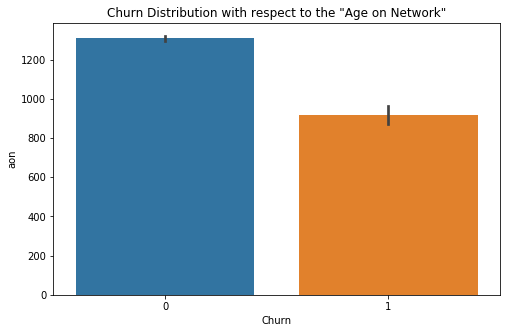

In [56]:
#Let's Visualize the 'Churn' column with respect to Age on network 'aon' column
plt.figure(figsize = (8,5))
plt.title('Churn Distribution with respect to the "Age on Network"')
sns.barplot(x=df1['Churn'],y=df1['aon'])
plt.show()

From the above plot, we can infer that the customers whose age on network is less than 1000 days are more prone to churn.

In [57]:
#Let's drop the columns of September month's or Churn phase.
#Fetching all the September month's columns
Sep = []
for i in df1.columns:
    if re.search('9',i) or re.search('sep',i):
        Sep.append(i)
    else:
        continue
Sep


['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g']

In [58]:
#Dropping
df1.drop(Sep,axis=1,inplace=True)
df1.shape

(26511, 150)

### Feature Engineering

Let's derive some new features which are nothing but the average of the first two months i.e., 6 and 7 with respect to the attributes -  revenue, recharge, incoming, outgoing,etc.,. 

In [59]:
#Let's fetch all the columns into a list
cols = df1.columns.tolist()
cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [60]:
#Deriving average arpu for the months of 6 and 7
df1['arpu_6_7'] = (df1['arpu_6']+df1['arpu_7'])/2
#Deriving average incoming minutes of usage for the months of 6 and 7
df1['Avg_ic_6_7'] = (df1['total_ic_mou_6']+df1['total_ic_mou_7'])/2
#Deriving average outgoing minutes of usage for the months of 6 and 7
df1['Avg_og_6_7'] = (df1['total_og_mou_6']+df1['total_og_mou_7'])/2
#Deriving average volume of 2g data used in mb for the months of 6 and 7
df1['Avg_vol_2g_mb_6_7'] = (df1['vol_2g_mb_6']+df1['vol_2g_mb_7'])/2
#Deriving average volume of 3g data used in mb for the months of 6 and 7
df1['Avg_vol_3g_mb_6_7'] = (df1['vol_3g_mb_6']+df1['vol_3g_mb_7'])/2

### Univariate Analysis

In [61]:
#Dividing columns into numerical, categorical
cat_features =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8',
             'fb_user_6','fb_user_7','fb_user_8','Churn']

num_features = [i for i in df1.columns if i not in cat_features]

print("There are {0} categorical features, {1} numerical features".format(len(cat_features),len(num_features)))


There are 7 categorical features, 148 numerical features


In [62]:
# change columns type
df1[num_features] = df1[num_features].apply(pd.to_numeric)
df1[cat_features] = df1[cat_features].apply(lambda column: column.astype("category"), axis=0)

In [63]:
#checking the new datatypes of the features
df1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26511 entries, 8 to 99988
Data columns (total 155 columns):
 #   Column                Dtype   
---  ------                -----   
 0   arpu_6                float64 
 1   arpu_7                float64 
 2   arpu_8                float64 
 3   onnet_mou_6           float64 
 4   onnet_mou_7           float64 
 5   onnet_mou_8           float64 
 6   offnet_mou_6          float64 
 7   offnet_mou_7          float64 
 8   offnet_mou_8          float64 
 9   roam_ic_mou_6         float64 
 10  roam_ic_mou_7         float64 
 11  roam_ic_mou_8         float64 
 12  roam_og_mou_6         float64 
 13  roam_og_mou_7         float64 
 14  roam_og_mou_8         float64 
 15  loc_og_t2t_mou_6      float64 
 16  loc_og_t2t_mou_7      float64 
 17  loc_og_t2t_mou_8      float64 
 18  loc_og_t2m_mou_6      float64 
 19  loc_og_t2m_mou_7      float64 
 20  loc_og_t2m_mou_8      float64 
 21  loc_og_t2f_mou_6      float64 
 22  loc_og_t2f_mou_7     

In [64]:
# create plotting functions

def data_type_check(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'

def univariate_plots(var, stats=True):
    plt.figure(figsize = (10,5))
    sns.set_style('whitegrid')
    if data_type_check(var) == 'numerical':
        sns.distplot(var)
        if stats == True:
            print(var.describe())
    
    elif data_type_check(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate_plots(var1, var2):
    plt.figure(figsize = (10,5))
    sns.set_style('whitegrid')
    if data_type_check(var1) == 'numerical' and data_type_check(var2) == 'numerical':     
        sns.scatterplot(var1, var2,hue = 'Churn',data = df1)      
    else:    
        sns.boxplot(var1, var2)

count   26511.0000
mean       12.2003
std         9.4300
min         0.0000
25%         6.0000
50%        10.0000
75%        15.0000
max       307.0000
Name: total_rech_num_6, dtype: float64


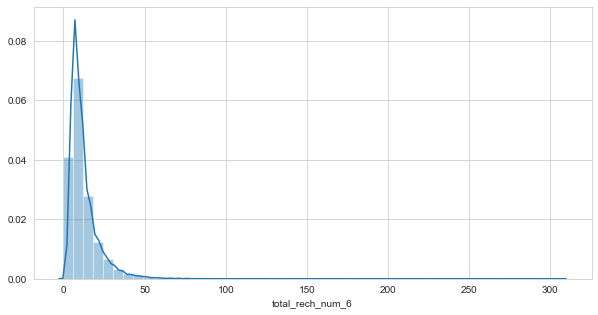

In [65]:
# checking the spread of total_rech_num_6
univariate_plots(df1.total_rech_num_6)

count   26511.0000
mean       12.1478
std         9.6025
min         0.0000
25%         6.0000
50%         9.0000
75%        15.0000
max       138.0000
Name: total_rech_num_7, dtype: float64


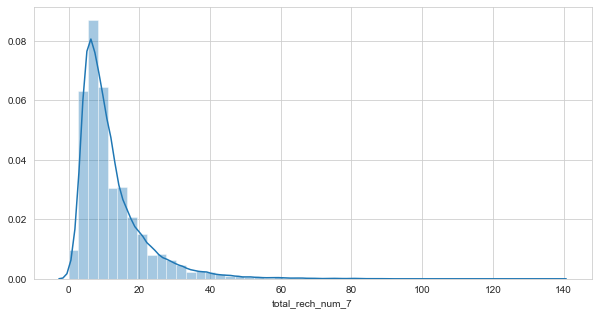

In [66]:
# checking the spread of total_rech_num_7
univariate_plots(df1.total_rech_num_7)

count   26511.0000
mean       10.7300
std         9.5521
min         0.0000
25%         5.0000
50%         8.0000
75%        13.0000
max       138.0000
Name: total_rech_num_8, dtype: float64


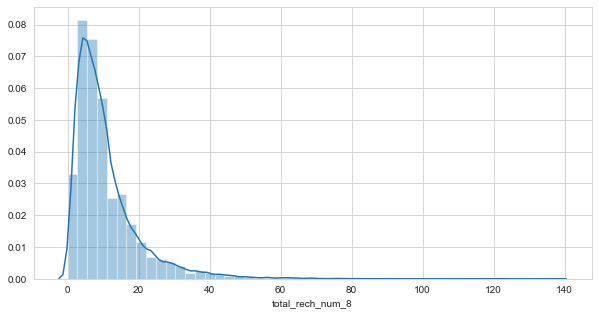

In [67]:
# checking the spread of total_rech_num_8
univariate_plots(df1.total_rech_num_8)

count   26511.0000
mean      172.4886
std       173.0693
min         0.0000
25%       110.0000
50%       120.0000
75%       200.0000
max      4010.0000
Name: max_rech_amt_6, dtype: float64


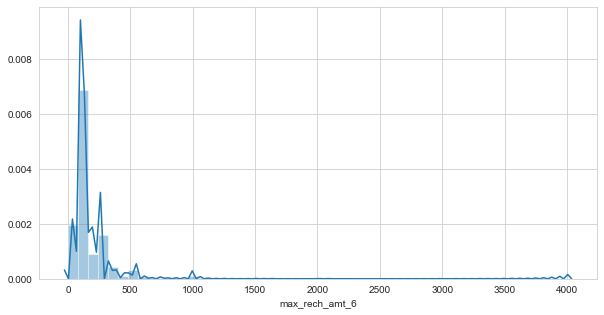

In [68]:
# checking the spread of max_rech_amt_6
univariate_plots(df1.max_rech_amt_6)

count   26511.0000
mean      177.3612
std       178.1324
min         0.0000
25%       110.0000
50%       128.0000
75%       200.0000
max      4010.0000
Name: max_rech_amt_7, dtype: float64


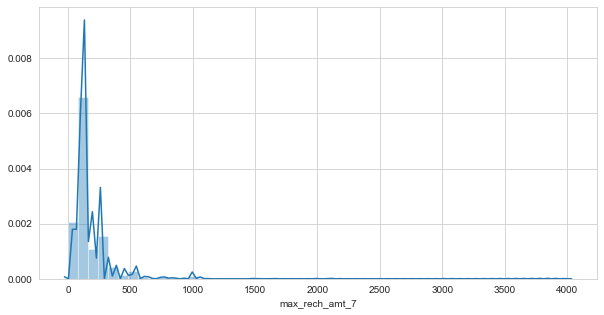

In [69]:
# checking the spread of max_rech_amt_7
univariate_plots(df1.max_rech_amt_7)

count   26511.0000
mean      169.5068
std       171.1202
min         0.0000
25%       100.0000
50%       130.0000
75%       198.0000
max      4449.0000
Name: max_rech_amt_8, dtype: float64


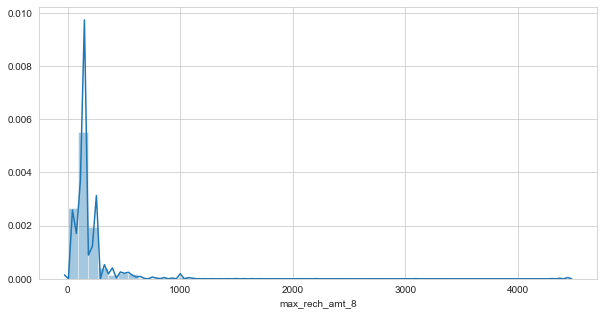

In [70]:
# checking the spread of max_rech_amt_8
univariate_plots(df1.max_rech_amt_8)

-1.0000    16329
0.0000      9912
1.0000       270
Name: night_pck_user_6, dtype: int64


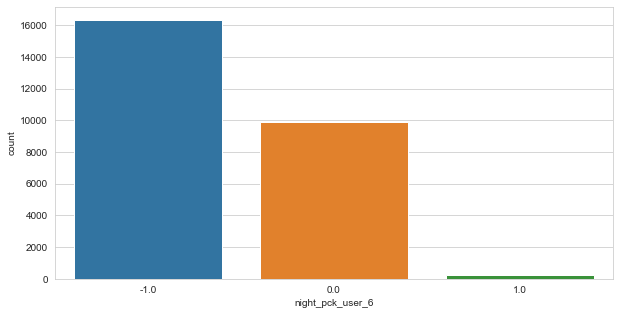

In [71]:
# checking the spread of night_pck_user_6
univariate_plots(df1.night_pck_user_6)

-1.0000    15999
0.0000     10250
1.0000       262
Name: night_pck_user_7, dtype: int64


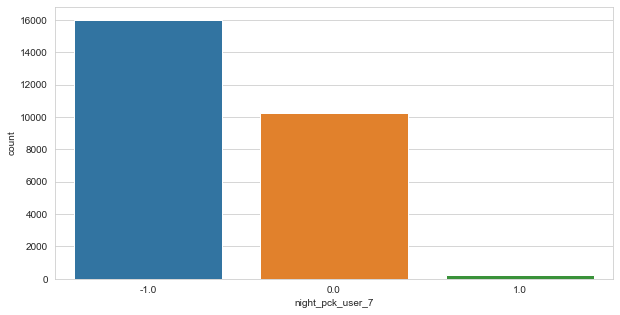

In [72]:
# checking the spread of night_pck_user_7
univariate_plots(df1.night_pck_user_7)

-1.0000    15640
0.0000     10610
1.0000       261
Name: night_pck_user_8, dtype: int64


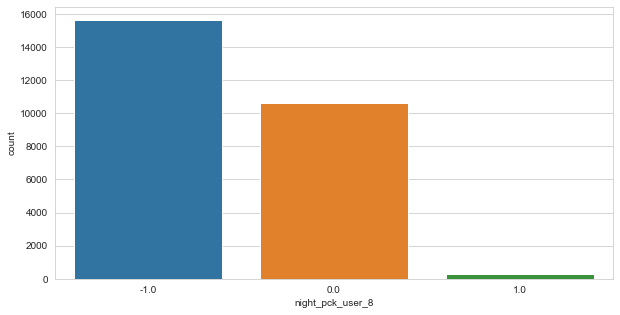

In [73]:
# checking the spread of night_pck_user_8
univariate_plots(df1.night_pck_user_8)

-1.0000    16329
1.0000      9111
0.0000      1071
Name: fb_user_6, dtype: int64


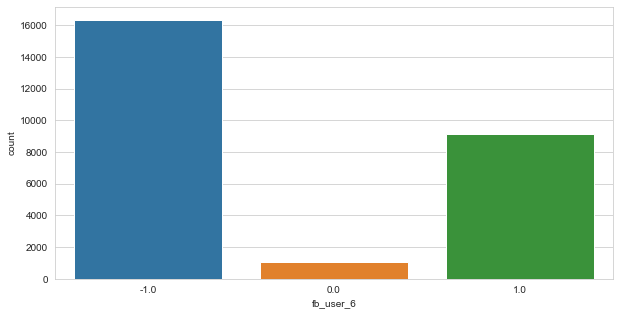

In [74]:
# checking the spread of fb_user_6
univariate_plots(df1.fb_user_6)

-1.0000    15999
1.0000      9331
0.0000      1181
Name: fb_user_7, dtype: int64


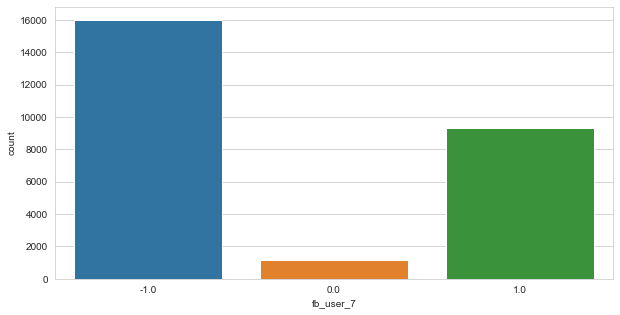

In [75]:
# checking the spread of fb_user_7
univariate_plots(df1.fb_user_7)

-1.0000    15640
1.0000      9081
0.0000      1790
Name: fb_user_8, dtype: int64


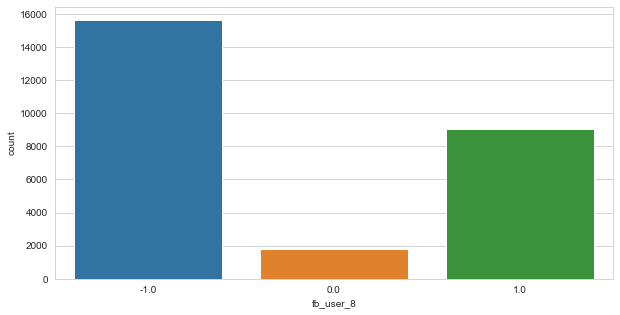

In [76]:
# checking the spread of fb_user_8
univariate_plots(df1.fb_user_8)

#### Bivariate Analysis

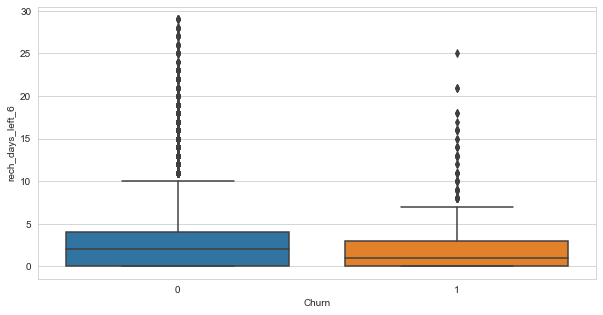

In [77]:
# checking the plot of rech_days_left_6 with respect to churn
bivariate_plots(df1.Churn, df1.rech_days_left_6)

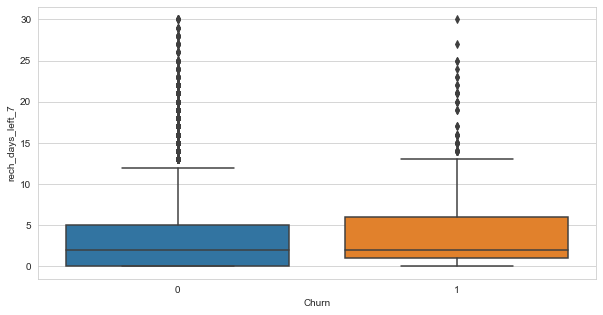

In [78]:
# checking the plot of rech_days_left_7 with respect to churn
bivariate_plots(df1.Churn, df1.rech_days_left_7)

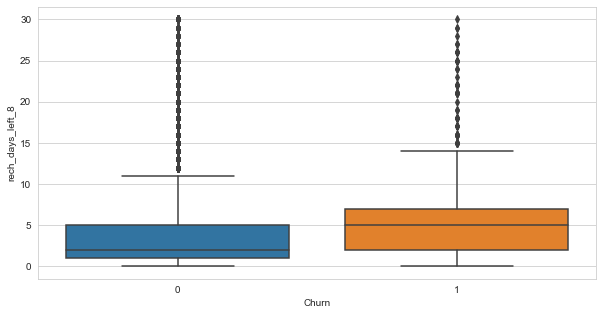

In [79]:
# checking the plot of rech_days_left_8 with respect to churn
bivariate_plots(df1.Churn, df1.rech_days_left_8)

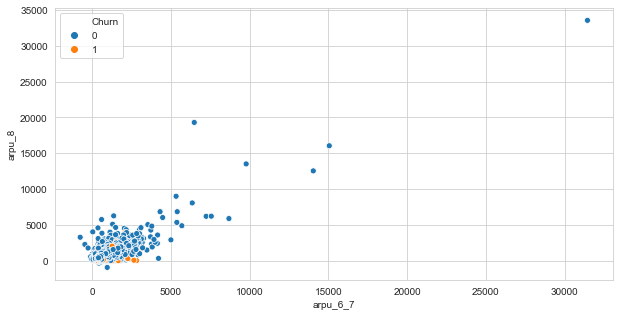

In [80]:
# comparing the arpu between good and action phases w.r.t churn
bivariate_plots(df1.arpu_6_7,df1.arpu_8)

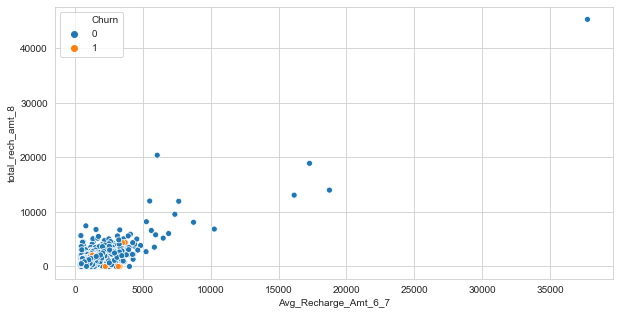

In [81]:
# comparing the recharge amount between good and action phases w.r.t churn
bivariate_plots(df1.Avg_Recharge_Amt_6_7,df1.total_rech_amt_8)

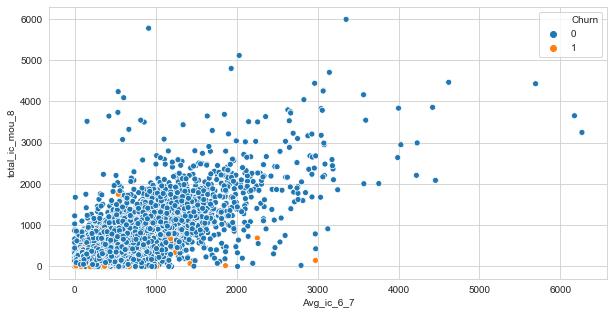

In [82]:
# comparing the incoming mou between good and action phases w.r.t churn
bivariate_plots(df1.Avg_ic_6_7,df1.total_ic_mou_8)

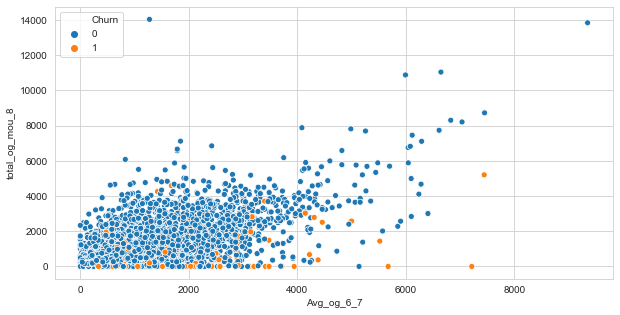

In [83]:
# comparing the outgoing mou between good and action phases w.r.t churn
bivariate_plots(df1.Avg_og_6_7,df1.total_og_mou_8)

`Inferences from both Univariate & Bivariate Analyses:`
1. "total_rech_num" and "max_rech_amt" columns are right skewed, because
    - number of recharges got decreased from 50 to 40 while transitioning from good phase to action phase ( i.e., from June to          August)
    - maximum recharge amount got decreased from 500 to 300 while transitioning from good phase to action phase ( i.e., from            June to August).
2. Number of Night pack users got decreased while transitioning from good phase to action phase.
3. Number of Facebook users got decreased while transitioning from good phase to action phase.
4. The difference between the last day of the month and the last day of the recharge during the same month got increased during    the June to August period.
5. Customers whose average revenue was less(<= 2500) in good phase  were likely to be churned in action phase.
6. Customers whose incoming minutes of usage was <=3000 during good phase were likely to be churned in action phase.
7. Most of the customers whose outgoing minutes of usage <= 5000 in good phase were likely to be churned in action phase and    also we could sense the presence of outliers.

### Outlier Treatment 

In [84]:
# taking copy of df1 into df2
df2 = df1.copy()

In [85]:
# Summary statistics before outlier treatment
df1[num_features].describe(percentiles =[0.01,0.05,0.25,0.50,0.75,0.95,0.99])


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,Avg_Recharge_Amt_6_7,arpu_6_7,Avg_ic_6_7,Avg_og_6_7,Avg_vol_2g_mb_6_7,Avg_vol_3g_mb_6_7
count,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000
mean,596.8110,608.0336,568.7216,304.0779,318.0901,288.0742,428.4832,441.7317,403.1316,17.6863,14.0512,14.1964,29.9481,22.7166,22.9393,99.0795,101.7118,94.1646,189.5441,191.3913,180.8652,7.327

In [86]:
# imputing outlies with 5% and 95% values as limits
for i in num_features:
    df2[i].clip(lower=df2[i].quantile(0.05), upper=df2[i].quantile(0.95), inplace = True)
df2[num_features].describe(percentiles =[0.01,0.05,0.25,0.50,0.75,0.95,0.99])  

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,Avg_Recharge_Amt_6_7,arpu_6_7,Avg_ic_6_7,Avg_og_6_7,Avg_vol_2g_mb_6_7,Avg_vol_3g_mb_6_7
count,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000,26511.0000
mean,574.9170,585.3430,543.6877,271.4918,284.2912,252.1849,396.6480,407.9885,368.4531,9.4297,5.8973,6.2787,17.3138,11.5820,11.5332,74.6694,75.8976,70.8495,171.5464,174.6993,163.9275,5.2605,5.

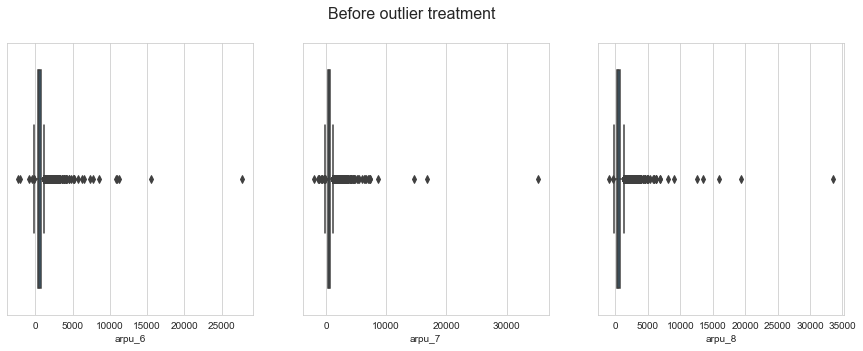

In [87]:
# Plot to show outlier distribution before outlier treatment
fig = plt.figure(figsize = (15,5))
fig.suptitle('Before outlier treatment', fontsize = 16)
plt.xticks(fontsize = 12)
plt.subplot(1,3,1)
sns.boxplot(df1.arpu_6)
plt.subplot(1,3,2)
sns.boxplot(df1.arpu_7)
plt.subplot(1,3,3)
sns.boxplot(df1.arpu_8)
plt.show()

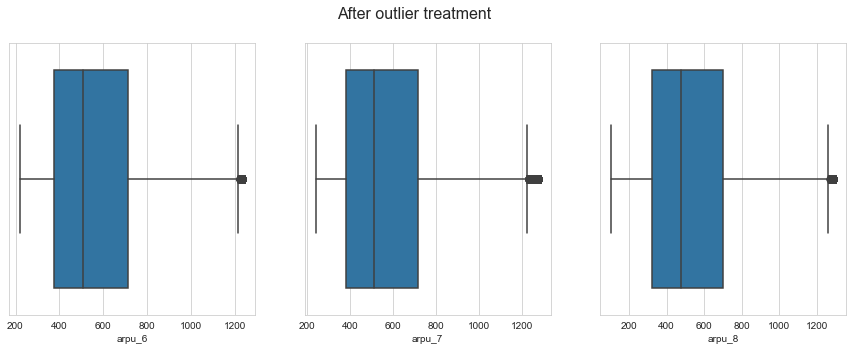

In [88]:
# Plot to show outlier distribution after outlier treatment
fig = plt.figure(figsize = (15,5))
fig.suptitle('After outlier treatment', fontsize = 16)
plt.xticks(fontsize = 12)
plt.subplot(1,3,1)
sns.boxplot(df2.arpu_6)
plt.subplot(1,3,2)
sns.boxplot(df2.arpu_7)
plt.subplot(1,3,3)
sns.boxplot(df2.arpu_8)
plt.show()

## 2. Data Preparation for Modelling

In [89]:
# Create dummy variables for all the six categorial variables

n_pck_6 = pd.get_dummies(df2['night_pck_user_6'],prefix="night_pck_jun",drop_first=True)
n_pck_7 = pd.get_dummies(df2['night_pck_user_7'],prefix="night_pck_jul",drop_first=True)
n_pck_8 = pd.get_dummies(df2['night_pck_user_8'],prefix="night_pck_aug",drop_first=True)

fb_6 = pd.get_dummies(df2['fb_user_6'],prefix="fb_jun", drop_first=True)
fb_7 = pd.get_dummies(df2['fb_user_7'],prefix="fb_jul",drop_first=True)
fb_8 = pd.get_dummies(df2['fb_user_8'],prefix="fb_aug",drop_first=True)

df2 = pd.concat([df2,n_pck_6],axis=1)
df2 = pd.concat([df2,n_pck_7],axis=1)
df2 = pd.concat([df2,n_pck_8],axis=1)

df2 = pd.concat([df2,fb_6],axis=1)
df2 = pd.concat([df2,fb_7],axis=1)
df2 = pd.concat([df2,fb_8],axis=1)

# drop all categorial columns
df2 = df2.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

In [90]:
# cross checking the columns
df2.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26511 entries, 8 to 99988
Data columns (total 161 columns):
 #   Column                Dtype   
---  ------                -----   
 0   arpu_6                float64 
 1   arpu_7                float64 
 2   arpu_8                float64 
 3   onnet_mou_6           float64 
 4   onnet_mou_7           float64 
 5   onnet_mou_8           float64 
 6   offnet_mou_6          float64 
 7   offnet_mou_7          float64 
 8   offnet_mou_8          float64 
 9   roam_ic_mou_6         float64 
 10  roam_ic_mou_7         float64 
 11  roam_ic_mou_8         float64 
 12  roam_og_mou_6         float64 
 13  roam_og_mou_7         float64 
 14  roam_og_mou_8         float64 
 15  loc_og_t2t_mou_6      float64 
 16  loc_og_t2t_mou_7      float64 
 17  loc_og_t2t_mou_8      float64 
 18  loc_og_t2m_mou_6      float64 
 19  loc_og_t2m_mou_7      float64 
 20  loc_og_t2m_mou_8      float64 
 21  loc_og_t2f_mou_6      float64 
 22  loc_og_t2f_mou_7     

In [91]:
# dividing the predictor and target variables and verifying the shape
X = df2.drop(['Churn'],axis=1)
y = df2['Churn']
print(X.shape,y.shape)

(26511, 160) (26511,)


In [92]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [93]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)


In [94]:
# print shapes of train and test sets
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(19883, 160) (19883,) (6628, 160) (6628,)


## 3. Model Bulding
### 1. Making Churn Predictions

#### PCA

In [95]:
#Applying pca on train data

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [96]:
# fitting and transforming the pca model on train data
pca.fit(X_train)
train_pca = pca.fit_transform(X_train)

In [97]:
pd.set_option("display.max_rows", 200)

# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      13.8300
1      24.0600
2      31.9500
3      37.1000
4      41.1600
5      44.2600
6      46.9700
7      49.3400
8      51.6800
9      53.9200
10     55.9600
11     57.8600
12     59.5000
13     60.9700
14     62.4200
15     63.8000
16     65.1600
17     66.4300
18     67.6300
19     68.8100
20     69.9100
21     70.8700
22     71.7900
23     72.6600
24     73.5000
25     74.3000
26     75.0600
27     75.7700
28     76.4700
29     77.1400
30     77.7800
31     78.4100
32     79.0200
33     79.6100
34     80.1800
35     80.7400
36     81.3000
37     81.8300
38     82.3600
39     82.8700
40     83.3600
41     83.8400
42     84.3000
43     84.7600
44     85.2000
45     85.6400
46     86.0700
47     86.4900
48     86.9000
49     87.3000
50     87.7000
51     88.0900
52     88.4700
53     88.8300
54     89.1900
55     89.5400
56     89.8700
57     90.2100
58     90.5400
59     90.8600
60     91.1700
61     91.4800
62     91.7800
63     92.0700
64     92.3700
65     92.6500
66     92.

`Inferences :`
1. 56 components explain 90% variance
2. 75 components explain 95% variance

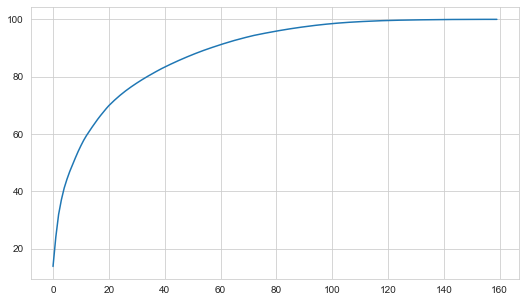

In [98]:
# plot feature variance
features = range(pca.n_components_)
cum_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cum_variance)
plt.show()

#### PCA with Logistic Regression

In [99]:
# create pipeline
pca_var_90 = 56
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=pca_var_90)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [100]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8554544082884876

#### Evaluation on test data

In [101]:
# predicting churn on test data
y_pred = pipeline.predict(X_test)

# creating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[5524  880]
 [  32  192]]


In [102]:
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives


In [103]:
# Let's check the  accuracy, sensitivy and Specificity of the model in %.
Accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity = (TP/(TP+FN))*100
Specificity = (TN/(TN+FP))*100
print("Accuracy:{0}, Sensitivity:{1}, Specificity:{2}".format(Accuracy,Sensitivity,Specificity))


Accuracy:86.24019312009656, Sensitivity:85.71428571428571, Specificity:86.2585883822611


In [104]:
# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.92


#### Hyperparameter tuning - PCA and Logistic Regression

In [105]:
# checking the class imbalance
y_train.value_counts()/y_train.shape

0   0.9662
1   0.0338
Name: Churn, dtype: float64

In [106]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [56, 75], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [107]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [56, 75]},
             scoring='roc_auc', verbose=1)

In [108]:
# cross validation results
pd.DataFrame(model.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.8550,0.1124,0.0000,0.0000,0.1000,l1,56,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,32
1,2.4730,0.2223,0.0000,0.0000,0.1000,l1,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,20
2,2.6028,0.0644,0.0953,0.0103,0.1000,l2,56,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.9132,0.9249,0.9204,0.9398,0.9338,0.9264,0.0094,3
3,3.2334,0.1073,0.0974,0.0309,0.1000,l2,75,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.9143,0.9242,0.9219,0.9380,0.9341,0.9265,0.0086,2
4,1.9637,0.1249,0.0000,0.0000,0.5000,l1,56,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",nan,nan,nan,nan,nan,nan,nan,21


In [109]:
# print best hyperparameters 
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.926549521566581
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 56}


#### Evaluation on test data

In [110]:
# predicting churn on test data
y_pred = pipeline.predict(X_test)

# creating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[5524  880]
 [  32  192]]


In [111]:
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives


In [112]:
# Let's check the  accuracy, sensitivy and Specificity of the model in %.
Accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity = (TP/(TP+FN))*100
Specificity = (TN/(TN+FP))*100
print("Accuracy:{0}, Sensitivity:{1}, Specificity:{2}".format(Accuracy,Sensitivity,Specificity))


Accuracy:86.24019312009656, Sensitivity:85.71428571428571, Specificity:86.2585883822611


In [113]:
# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.92


#### Random Forest

In [114]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
R_forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=R_forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [115]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [116]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9634033681005523
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


#### Evaluation on test data

In [117]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[6358   46]
 [ 157   67]]


In [118]:
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives


In [119]:
# Let's check the  accuracy, sensitivy and Specificity of the model in %.
Accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity = (TP/(TP+FN))*100
Specificity = (TN/(TN+FP))*100
print("Accuracy:{0}, Sensitivity:{1}, Specificity:{2}".format(Accuracy,Sensitivity,Specificity))

Accuracy:96.93723596861798, Sensitivity:29.910714285714285, Specificity:99.28169893816364


In [120]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.96


`Inferences :`
We could see poor sensitivity(29) in random forest model. Therefore the best model is PCA along with Logistic regression.

### 2. Choosing best features

#### Random forest

In [121]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

r_forest_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [122]:
# fit model
r_forest_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [123]:
# OOB score
r_forest_model.oob_score_

0.9684655233113715

#### Evaluation on test data

In [124]:
# predicting churn on test data
y_pred = r_forest_model.predict(X_test)

# creating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6359   45]
 [ 162   62]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [125]:
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives


In [126]:
# Let's check the  accuracy, sensitivy and Specificity of the model in %.
Accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity = (TP/(TP+FN))*100
Specificity = (TN/(TN+FP))*100
print("Accuracy:{0}, Sensitivity:{1}, Specificity:{2}".format(Accuracy,Sensitivity,Specificity))

Accuracy:96.87688593844297, Sensitivity:27.67857142857143, Specificity:99.29731417863835


In [127]:
# check area under curve
y_pred_prob = r_forest_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


AUC:    	 0.96


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


#### Important Features

In [128]:
# predictors
predictors = df2.drop('Churn', axis=1).columns

# feature_importance
imp = r_forest_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': predictors, 'importance_percentage': imp*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,roam_ic_mou_8,11.2185
1,roam_og_mou_8,10.5555
2,loc_ic_t2m_mou_8,5.6826
3,total_ic_mou_8,4.8713
4,loc_ic_mou_8,3.7186
5,loc_ic_t2t_mou_8,3.2998
6,loc_og_t2m_mou_8,3.2888
7,loc_og_mou_8,3.1986
8,loc_og_t2t_mou_8,2.9127
9,total_og_mou_8,2.6167


#### Considering the top 30 fetures

In [129]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

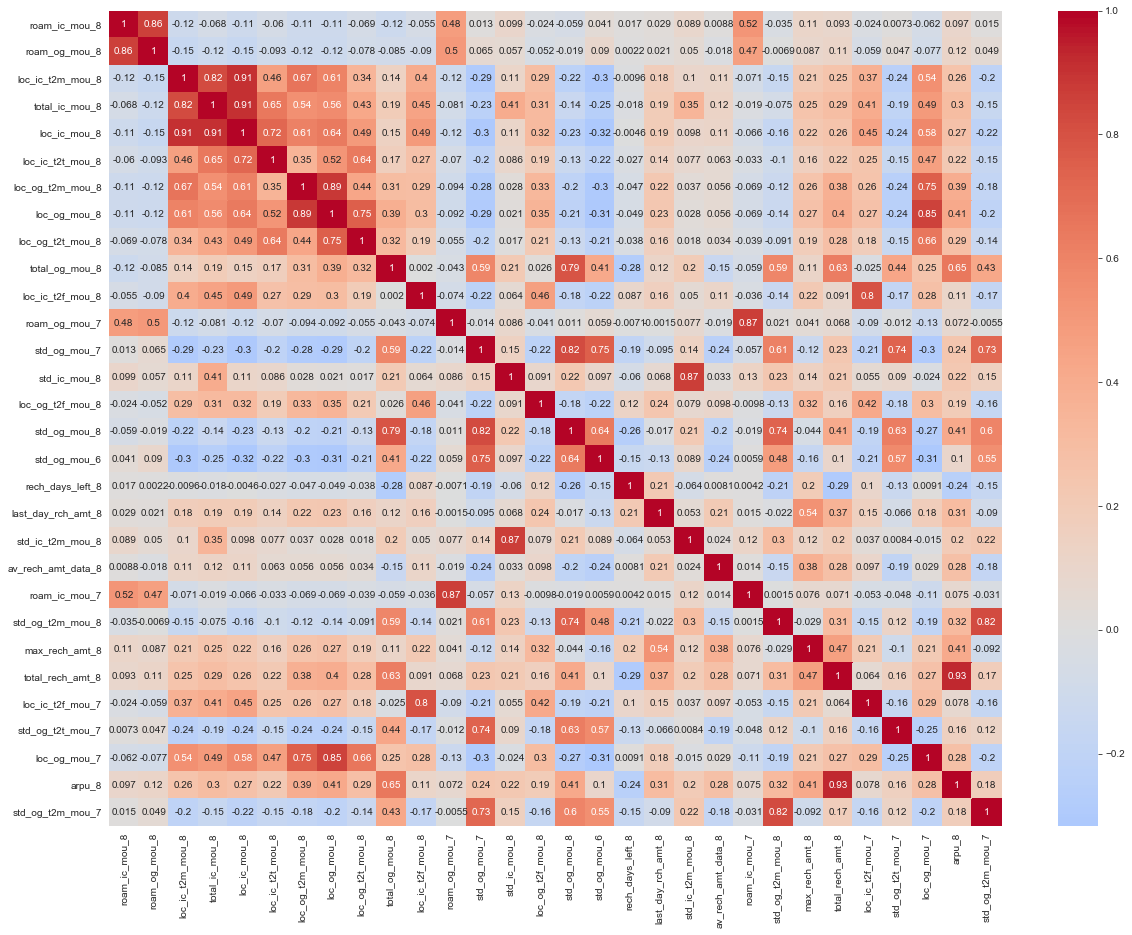

In [130]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(20,15)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap='coolwarm', annot = True)
plt.show()

In [131]:
# extract top '20' features
top_20_features = feature_importance.variables[0:20]

In [132]:
#dividing data into test and train with top 20 features
X_train = X_train[top_20_features]
X_test = X_test[top_20_features]

In [133]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [134]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [135]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9237483768034884
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2'}


In [136]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)


[[6002  402]
 [  71  153]]


In [137]:
TP = cf_matrix[1,1] # true positive 
TN = cf_matrix[0,0] # true negatives
FP = cf_matrix[0,1] # false positives
FN = cf_matrix[1,0] # false negatives

In [138]:
# Let's check the  accuracy, sensitivy and Specificity of the model in %.
Accuracy = ((TP+TN)/(TP+TN+FP+FN))*100
Sensitivity = (TP/(TP+FN))*100
Specificity = (TN/(TN+FP))*100
print("Accuracy:{0}, Sensitivity:{1}, Specificity:{2}".format(Accuracy,Sensitivity,Specificity))


Accuracy:92.86360893180446, Sensitivity:68.30357142857143, Specificity:93.72267332916927


In [139]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.92


#### Extracting intercepts and coefficients on logistic regression model

In [140]:
# building logistic regression model
logistic_model = model.best_estimator_.named_steps['logistic']

In [141]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [142]:
# coefficients
coefficients = logistic_model.coef_.reshape((20, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 4) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [143]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,roam_ic_mou_8,roam_og_mou_8,loc_ic_t2m_mou_8,total_ic_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,loc_og_t2t_mou_8,total_og_mou_8,loc_ic_t2f_mou_8,roam_og_mou_7,std_og_mou_7,std_ic_mou_8,loc_og_t2f_mou_8,std_og_mou_8,std_og_mou_6,rech_days_left_8,last_day_rch_amt_8,std_ic_t2m_mou_8
0,-3.3323,0.2150,0.4215,-0.4809,-0.0267,-0.3473,-0.2329,-0.4201,-0.0512,-0.1311,-0.3009,-0.3381,0.1567,0.3530,-0.1488,-0.2953,-0.0340,0.3550,0.5223,-0.6051,-0.0934


## Conclusion

1. Telecom company needs to pay attention to the roaming rates compared to local rates. They need to provide better offers to the customers who are using services from a roaming zone.
2. The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with necessary packages.
3. Business should concentrate on the recharge amounts in action phase as they are proportional to chrun.
4. Customers with less minutes of usage duromg action phase are likely to be churned. So business needs to focus on those customers by providing them with targeted offers.
 
